## EXERCICI 1
### Explica quines comandes de Linux Pots fer servir a l’hora d’analitzar logs escrits a fitxer per a: 

* Veure contínuament els logs que es van escrivint a un arxiu

  **~$ tail -f /ruta/al/fitxer.l**
      
* Cercar una paraula concreta dintre d’un arxiu de log

  **~$ grep "error" /ruta/al/fitxer.log**
          


## EXERCICI 2

### 1- En aquest exercici recuperarem el bucle d’exemple que vam fer servir a les sessions de teoria, i configurarem el log per què  els misstatges d’error (isuperiors) vagin a un arxiu, i els missatges d’info (i superiors) vagin a un altre arxiu, mentre que tots els missatges es mostren a la vegada per pantalla. A més, afegirem un nou missatge d’info a l’aplicació  pel que farem servir un logger especial i diferent del que ja hem fet servir, i que tindrà un manegador amb format csv.  Fes commit al repositori cada vegada que tinguis resolt i funcionant una d’aquestes coses:

* logs d’info a fitxer de logs d’info i logs d’error a fitxer de logs d’error
* Afegir, a mes del handler de fitxer per a fitxers info, un handler de pantalla amb nivell info
* Afegir un nou logger amb un nou manegador i un nou formatador a CSV, i afegir una línia al programa que generi aquests logs
* Pujar al repositori una mostra d’unes 20 linies dels fitxers de logs generats per la vostra aplicació: un d’info, un d’error, i un en format CSV
 



In [1]:
import logging
import os
import csv

# Crear una carpeta 'logs' si no existe
if not os.path.exists('logs'):
    os.makedirs('logs')

# Crear el logger principal
logger = logging.getLogger('app_logger')
logger.setLevel(logging.DEBUG)

# Handler para logs de info
info_handler = logging.FileHandler('logs/info_log.log')
info_handler.setLevel(logging.INFO)
info_formatter = logging.Formatter('%(asctime)s - %(levelname)s - %(message)s')
info_handler.setFormatter(info_formatter)

# Handler para logs de error
error_handler = logging.FileHandler('logs/error_log.log')
error_handler.setLevel(logging.ERROR)
error_formatter = logging.Formatter('%(asctime)s - %(levelname)s - %(message)s')
error_handler.setFormatter(error_formatter)

# Handler para mostrar logs en pantalla
console_handler = logging.StreamHandler()
console_handler.setLevel(logging.INFO)
console_handler.setFormatter(info_formatter)

# Agregar handlers al logger
logger.addHandler(info_handler)
logger.addHandler(error_handler)
logger.addHandler(console_handler)

# Crear un logger CSV
csv_logger = logging.getLogger('csv_logger')
csv_logger.setLevel(logging.DEBUG)

# Crear un handler para escribir logs en formato CSV
csv_file_handler = logging.FileHandler('logs/csv_log.csv')
csv_file_handler.setLevel(logging.INFO)

# Crear un formatter para el CSV
csv_formatter = logging.Formatter('%(asctime)s,%(levelname)s,%(message)s')
csv_file_handler.setFormatter(csv_formatter)

# Agregar el handler CSV al logger
csv_logger.addHandler(csv_file_handler)

# Generar múltiples logs
for i in range(1, 21):
    logger.info(f'Este es un mensaje de info número {i}')
    if i % 2 == 0:
        logger.error(f'Este es un mensaje de error número {i}')
    csv_logger.info(f'CSV log mensaje {i}')
    logger.info(f'Este mensaje se muestra por pantalla: número {i}')

# Función para mostrar las primeras 20 líneas de un archivo de log
def mostrar_primers_logs(file_path):
    with open(file_path, 'r') as f:
        lines = f.readlines()
        return lines[:20]

# Mostrar los primeros 20 logs de cada archivo
info_logs = mostrar_primers_logs('logs/info_log.log')
error_logs = mostrar_primers_logs('logs/error_log.log')
csv_logs = mostrar_primers_logs('logs/csv_log.csv')

print("Logs de info:")
print(info_logs)

print("Logs de error:")
print(error_logs)

print("Logs CSV:")
print(csv_logs)

2024-11-26 19:21:10,898 - INFO - Este es un mensaje de info número 1
2024-11-26 19:21:10,899 - INFO - Este mensaje se muestra por pantalla: número 1
2024-11-26 19:21:10,900 - INFO - Este es un mensaje de info número 2
2024-11-26 19:21:10,901 - ERROR - Este es un mensaje de error número 2
2024-11-26 19:21:10,902 - INFO - Este mensaje se muestra por pantalla: número 2
2024-11-26 19:21:10,903 - INFO - Este es un mensaje de info número 3
2024-11-26 19:21:10,904 - INFO - Este mensaje se muestra por pantalla: número 3
2024-11-26 19:21:10,904 - INFO - Este es un mensaje de info número 4
2024-11-26 19:21:10,905 - ERROR - Este es un mensaje de error número 4
2024-11-26 19:21:10,908 - INFO - Este mensaje se muestra por pantalla: número 4
2024-11-26 19:21:10,909 - INFO - Este es un mensaje de info número 5
2024-11-26 19:21:10,910 - INFO - Este mensaje se muestra por pantalla: número 5
2024-11-26 19:21:10,911 - INFO - Este es un mensaje de info número 6
2024-11-26 19:21:10,911 - ERROR - Este es un

Logs de info:
['2024-11-26 19:19:04,277 - INFO - Este es un mensaje de info número 1\n', '2024-11-26 19:19:04,280 - INFO - Este mensaje se muestra por pantalla: número 1\n', '2024-11-26 19:19:04,282 - INFO - Este es un mensaje de info número 2\n', '2024-11-26 19:19:04,283 - ERROR - Este es un mensaje de error número 2\n', '2024-11-26 19:19:04,285 - INFO - Este mensaje se muestra por pantalla: número 2\n', '2024-11-26 19:19:04,286 - INFO - Este es un mensaje de info número 3\n', '2024-11-26 19:19:04,288 - INFO - Este mensaje se muestra por pantalla: número 3\n', '2024-11-26 19:19:04,290 - INFO - Este es un mensaje de info número 4\n', '2024-11-26 19:19:04,291 - ERROR - Este es un mensaje de error número 4\n', '2024-11-26 19:19:04,293 - INFO - Este mensaje se muestra por pantalla: número 4\n', '2024-11-26 19:19:04,294 - INFO - Este es un mensaje de info número 5\n', '2024-11-26 19:19:04,295 - INFO - Este mensaje se muestra por pantalla: número 5\n', '2024-11-26 19:19:04,296 - INFO - Este

### 2- Que creieu que és millor mostrar els logs per exemple a la terminal durant l'execució del programa o bolcar-los en un fitxer de text?

#### Mostrar logs en la terminal:

**Ventajas:**

* Visibilidad inmediata: Los mensajes de log se muestran en tiempo real, lo que es útil durante el desarrollo o para la depuración de problemas rápidamente.
* Simplicidad: No necesitas gestionar archivos adicionales, lo que puede ser más sencillo para pruebas rápidas.
* Interactividad: Si estás ejecutando el programa en un entorno de desarrollo, puedes hacer análisis en vivo y tomar decisiones rápidas según el comportamiento del sistema.

**Desventajas:**

* No queda registrado: Una vez que cierras la terminal o terminas la ejecución, los logs se pierden (a menos que los redirijas manualmente a un archivo).
* Difícil de gestionar: En proyectos grandes, con múltiples usuarios o aplicaciones, la terminal puede volverse caótica si tienes demasiados mensajes de log.

#### Volcar logs en un archivo de texto:

**Ventajas:**

* Persistencia: Los logs quedan almacenados, lo que permite hacer auditorías, revisarlos más tarde, o incluso analizarlos históricamente.
* Organización: Puedes clasificar los logs en diferentes archivos según el tipo de mensaje (por ejemplo, info_log.log, error_log.log), lo que facilita su gestión.
* Análisis posterior: Es mucho más fácil realizar análisis avanzados de logs, como búsqueda de patrones o problemas, especialmente si tienes herramientas de * análisis de logs como ELK stack, Splunk, etc.

**Desventajas:**

* Consumo de espacio: Los archivos de log pueden crecer rápidamente, especialmente si tu aplicación tiene una gran cantidad de registros.
* Requiere gestión adicional: Debes gestionar la creación de los archivos, los posibles permisos de escritura y rotación de logs (por ejemplo, usar compresión o eliminación de archivos antiguos).

#### ¿Qué es mejor?
**Durante el desarrollo:** Es común mostrar los logs en la terminal para obtener retroalimentación inmediata mientras estás trabajando en el código.

**Para producción:** Es mejor almacenar los logs en archivos, porque puedes revisarlos más tarde si ocurre algún problema, y los logs también se pueden almacenar de forma segura o analizar a fondo en caso de errores graves

###  3- Omple la següent taula amb expmple, avantantges, i desavantatges de les següents maneres de fer logs:

| **Exemple**                                                 | **Avantatges**                                                                                                                                                   | **Desavantatges**                                                                                                                                         |
|-------------------------------------------------------------|-----------------------------------------------------------------------------------------------------------------------------------------------------------------|----------------------------------------------------------------------------------------------------------------------------------------------------------|
| **Fent servir la configuració per defecte del mòdul logging** | - Ràpida configuració sense necessitat de crear un objecte logger explícit. <br>- Ideal per a aplicacions senzilles o petites.                                    | - Menys flexibilitat i personalització. <br>- No permet una configuració detallada, com l'assignació de múltiples "handlers" o formats específics.    |
| **Instanciant un objecte logger i parametritzant-lo des de programa** | - Major flexibilitat i control. <br>- Permet configurar múltiples handlers i formats. <br>- Fàcil integració amb altres parts de l'aplicació.                   | - Pot requerir més codi i configuració manual. <br>- Més complexitat, especialment per a aplicacions petites o simples.                                  |
| **Instanciant un objecte logger a partir d’una configuració emmagatzemada a fitxer** | - Permet configurar logs de manera centralitzada i independent del codi. <br>- Facilita canviar configuracions sense modificar el codi.                         | - Pot ser més difícil de gestionar per a desenvolupadors poc familiaritzats amb la configuració en fitxers. <br>- Requereix un sistema de gestió de fitxers adequat. |


### 4- Cerca llibreries de logs en altres llenguatjes (al menys 2, i identifica cóm resolen les següents característiques típiques d’un sistema de logging.  Omple la següent taula, i inclou-la al read-me del repositori:


|                   |  **Llenguatge 1**   | **Llenguatge 2**  |
|-------------------|---------------------|----------------------|
| **Nom de la llibreria** | **Loguru** (Python)  | **Log4j** (Java)     |                      |
| **És nativa del llenguatge?** | No (es una llibreria externa) | No (es una llibreria externa) |                      |
| **URL per descargar-se la llibreria** | [https://github.com/Delgan/loguru](https://github.com/Delgan/loguru) | [https://logging.apache.org/](https://logging.apache.org/) |                      |
| **Inicialització de l’objecte de logger** | `logger = loguru.logger` | `Logger logger = LogManager.getLogger(YourClass.class);` |                      |
| **Nivells de log disponibles** | TRACE, DEBUG, INFO, WARNING, ERROR, CRITICAL | TRACE, DEBUG, INFO, WARN, ERROR, FATAL |                      |
| **Mètode per fer log** | `logger.info("Missatge d'informació")` | `logger.info("Missatge d'informació")` |                      |
| **Tipus de manegadors (pantalla, fitxer…) Identificar els seus noms a la API** | Pantalla (ConsoleHandler), Fitxer (FileHandler) | Pantalla (ConsoleAppender), Fitxer (FileAppender) |                      |
| **Opcions de format** | Personalitzable (per exemple, `"{time:YYYY-MM-DD HH:mm:ss} | {level} | {message}"`) | Personalitzable (per exemple, `%d [%t] %-5p %c - %m%n`) |                      |


## EXERCICI 3

### Mitjançant les eines proposades a continuació, voldríem elaborar una petita aplicació que permetés a un treballador de forma senzilla introduir mitjançant un fitxer json, txt csv o similar introduir unes dades que escollim i li elaborem una sèrie de gràfiques.

**Abans d’això, caldrà informar-se sobre les següents eines, alguna de les quals potser ja coneixeu.**

* Pandas
* Jupyter Notebook
* reportlab

**La idea d'aquest punt és detallar,**

* La funcionalitat de cada una de les eines presentades.
* Caldrà posar captures de les proves que heu fet i argumentar quines eines i llibreries utilitzareu finalment.

#### Herramientas a evaluar:

**1. Pandas**

* Funcionalidad:

    * Biblioteca de Python para el análisis de datos.
    * Trabaja principalmente con dos tipos de datos: Series (columnas) y DataFrames (tablas).
    * Es ideal para leer, transformar y manipular datos provenientes de formatos como JSON, CSV o TXT.
    * Permite filtros, agrupaciones y transformaciones avanzadas.

* ¿Por qué usar-la?

    * Es eficiente y fácil de utilitzar para gestionar grandes cantidades de datos.
    * Tiene integración con otras librerias como Matplotlib y Seaborn para visualización de datos.


**2. Jupyter Notebook**

* Funcionalidad:

    * Entorno interactivo basado en web para ejecutar código Python.
    * Permite combinar código, documentación y gráficas en una misma interfaz.
    * Ideal para el desarrollo iterativo, ya que puedes ejecutar fragmentos de código y ver resultados inmediatos.


* ¿Por qué usar-la?

    * Fácil de compartir (se puede exportar en formato HTML o PDF).
    * Es perfecto para presentar trabajos, experimentos o informes interactivos.
    * Permite integrar visualizaciones gráficas directamente en el notebook.


**3. ReportLab**

* Funcionalidad:

    * Libreria para la generación de documentos PDF desde Python.
    * Permite crear documentos con texto, gráficos, tablas y otros elementos personalizados.
    * Suporta múltiples opciones de estilo (fuentes, colores, alineaciones).


* ¿Por qué usar-la?

    * És ideal per generar informes finals en PDF amb dades i gràfiques.
    * Puede integrar resultados de datos y visualizaciones creadas con otras herramientas (Pandas, Matplotlib, etc.).

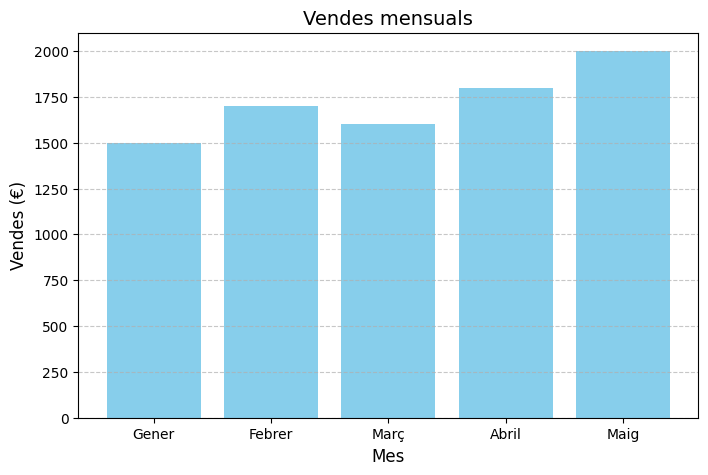

In [2]:
# Ejemplo práctico con el uso de gráficos

import pandas as pd
import matplotlib.pyplot as plt

# Crear dades fictícies
dades = {
    'Mes': ['Gener', 'Febrer', 'Març', 'Abril', 'Maig'],
    'Vendes': [1500, 1700, 1600, 1800, 2000]
}

# Convertir a DataFrame
df = pd.DataFrame(dades)

# Crear el gràfic
plt.figure(figsize=(8, 5))
plt.bar(df['Mes'], df['Vendes'], color='skyblue')
plt.title('Vendes mensuals', fontsize=14)
plt.xlabel('Mes', fontsize=12)
plt.ylabel('Vendes (€)', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

## EXERCICI 4

### En aquest exercici caldrà generar per exemple un CSV amb les dades que treballareu. RECORDAR que el CSV treballa amb comes. Un cop generat el CSV, caldrà bolcar les dades al JUPYTER i comprovar que es mostren correctament.



In [5]:
import pandas as pd

# Datos de ejemplo
data = {
    'Professor': ['Emili', 'Mario', 'Steven', 'Ana', 'Joan', 'Carla', 'David', 'Eva', 'Marc', 'Laura',
                  'Jordi', 'Carme', 'Pau', 'Rosa', 'Pere', 'Sofia', 'Luis', 'Carmen', 'Ricard', 'Monica'],
    'Alumne': ['Xavier', 'Marc', 'Jaume', 'Santi', 'Lluís', 'Irene', 'Miquel', 'Patricia', 'Josep', 'Ruth',
               'Albert', 'Toni', 'Xavi', 'Clara', 'Sergi', 'Bea', 'Jordi', 'Carlos', 'David', 'Marta'],
    'M01': [7, 10, 8, 6, 9, 7, 10, 9, 8, 6, 7, 8, 9, 6, 10, 8, 7, 9, 6, 5],
    'M04': [9, 3, 5, 7, 6, 8, 5, 6, 8, 9, 10, 4, 6, 5, 7, 9, 8, 7, 6, 8],
    'M03': [5, 5, 6, 8, 7, 9, 8, 6, 7, 5, 6, 7, 8, 6, 9, 8, 6, 7, 7, 5],
    'M05': [8, 8, 4, 7, 8, 9, 7, 6, 7, 8, 6, 9, 7, 6, 5, 7, 8, 6, 5, 8]
}

# Crear DataFrame
df = pd.DataFrame(data)

# Guardar a CSV
df.to_csv('dades_alumnes.csv', index=False)

# Mostrar primeres files per verificar
df.head()

# Carregar el fitxer CSV
df_cargado = pd.read_csv('dades_alumnes.csv')

# Mostrar tota la taula
pd.set_option('display.max_rows', None)  # Mostrar totes les files
pd.set_option('display.max_columns', None)  # Mostrar totes les columnes

# Mostrar el DataFrame complet
df_cargado

,Professor,Alumne,M01,M04,M03,M05
0,Emili,Xavier,7,9,5,8
1,Mario,Marc,10,3,5,8
2,Steven,Jaume,8,5,6,4
3,Ana,Santi,6,7,8,7
4,Joan,Lluís,9,6,7,8
5,Carla,Irene,7,8,9,9
6,David,Miquel,10,5,8,7
7,Eva,Patricia,9,6,6,6
8,Marc,Josep,8,8,7,7
9,Laura,Ruth,6,9,5,8


## EXERCICI 5

### Un cop tractades les dades introduïdes via fitxer caldrà investigar la llibreria que hagueu triat i elaborar com a mínim el codi necessari per presentar de forma que tinguin sentit amb l'àmbit del problema una sèrie de dades transformades obtingudes corresponents a:

* La mitjana de nota final de cada alumne
* La mitjana de nota final de tots els alumnes en conjunts.
* Percentatges d'aprovats i suspesos
* Notes més baixes o més altes.
* Algun altre que creieu interessant.



In [1]:
import pandas as pd

# Cargar el archivo CSV con los datos
df = pd.read_csv('dades_alumnes.csv')

# 1. Mitjana de nota final de cada alumne
df['Mitjana'] = df[['M01', 'M04', 'M03', 'M05']].mean(axis=1)
print("Mitjana de nota final per alumne:")
print(df[['Alumne', 'Mitjana']])

# 2. Mitjana de nota final de tots els alumnes en conjunt
mitjana_general = df['Mitjana'].mean()
print(f"\nMitjana de nota final de tots els alumnes: {mitjana_general:.2f}")

# 3. Percentatges d'aprovats i suspesos (notas >= 5 aprobados)
total_alumnes = len(df)
aprovats = len(df[df['Mitjana'] >= 5])
suspensos = total_alumnes - aprovats
percentatge_aprovats = (aprovats / total_alumnes) * 100
percentatge_suspensos = (suspensos / total_alumnes) * 100
print(f"\nPercentatge d'aprovats: {percentatge_aprovats:.2f}%")
print(f"Percentatge de suspesos: {percentatge_suspensos:.2f}%")

# 4. Nota més alta i més baixa de tota la classe
nota_mes_alta = df[['M01', 'M04', 'M03', 'M05']].max().max()
nota_mes_baixa = df[['M01', 'M04', 'M03', 'M05']].min().min()
print(f"\nNota més alta de tota la classe: {nota_mes_alta}")
print(f"Nota més baixa de tota la classe: {nota_mes_baixa}")

# 5. Alumne amb la millor mitjana
millor_alumne = df.loc[df['Mitjana'].idxmax(), 'Alumne']
print(f"\nAlumne amb la millor mitjana: {millor_alumne}")

Mitjana de nota final per alumne:
      Alumne  Mitjana
0     Xavier     7.25
1       Marc     6.50
2      Jaume     5.75
3      Santi     7.00
4      Lluís     7.50
5      Irene     8.25
6     Miquel     7.50
7   Patricia     6.75
8      Josep     7.50
9       Ruth     7.00
10    Albert     7.25
11      Toni     7.00
12      Xavi     7.50
13     Clara     5.75
14     Sergi     7.75
15       Bea     8.00
16     Jordi     7.25
17    Carlos     7.25
18     David     6.00
19     Marta     6.50

Mitjana de nota final de tots els alumnes: 7.06

Percentatge d'aprovats: 100.00%
Percentatge de suspesos: 0.00%

Nota més alta de tota la classe: 10
Nota més baixa de tota la classe: 3

Alumne amb la millor mitjana: Irene


## EXERCICI 6
### De la mateixa manera que a l'exercici 5 caldrà investigar una llibreria per a realitzar gràfics de dades visuals i elaborar com a mínim el codi necessari per presentar de forma que tinguin sentit amb l'àmbit del problema.

**Com a restricció caldrà com a mínim generar 4 gràfiques coherents.**


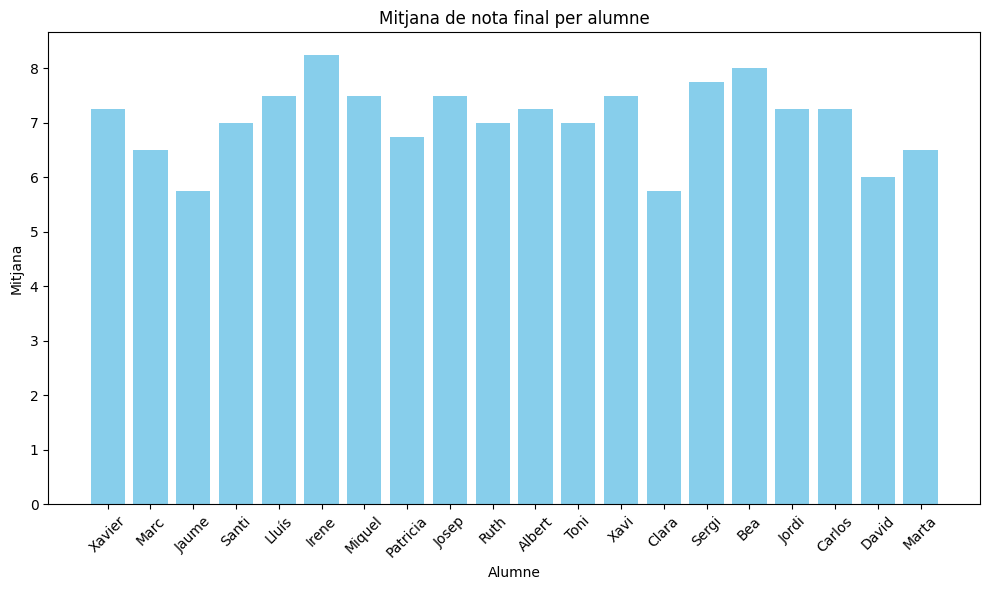

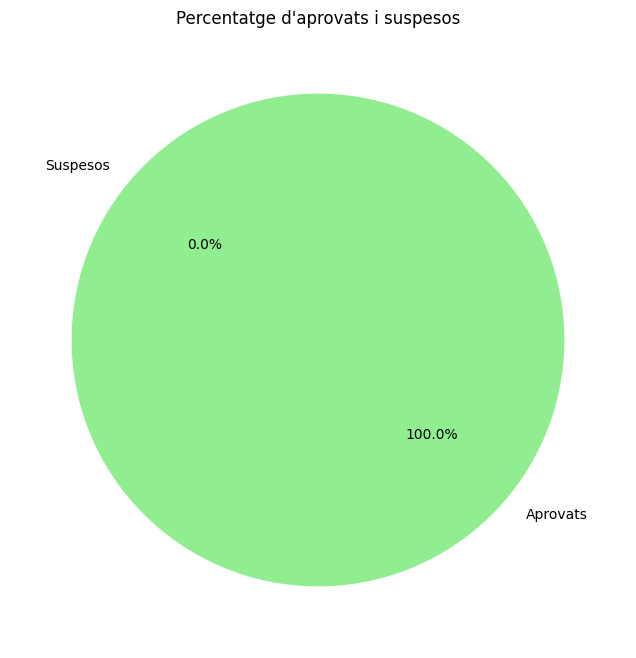

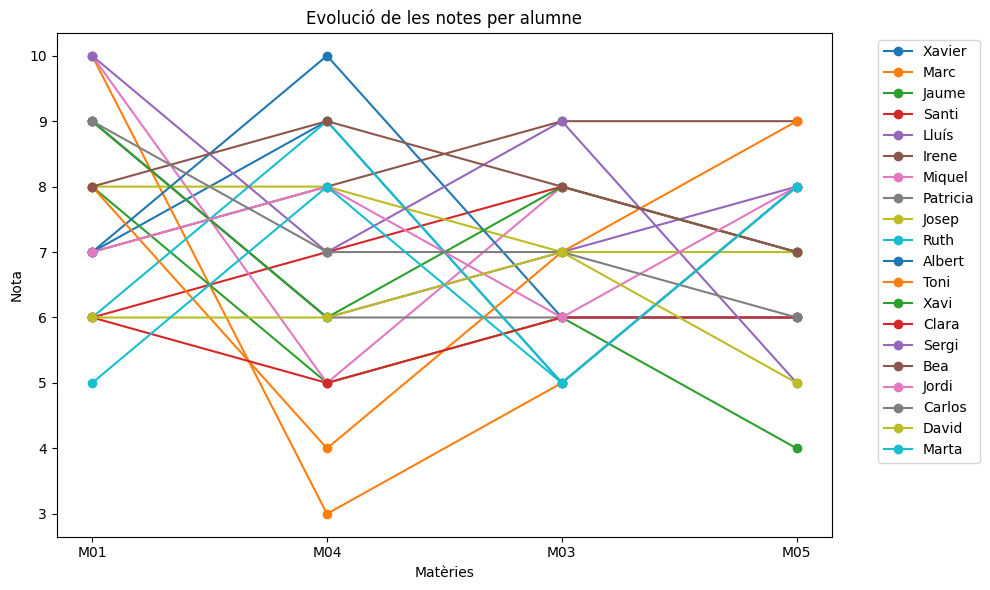

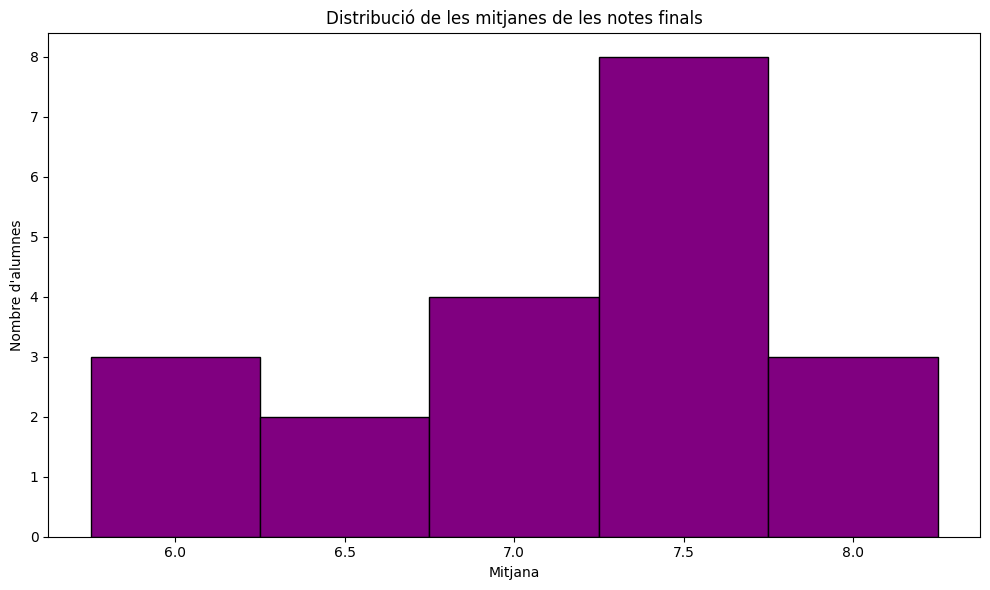

In [3]:
import matplotlib.pyplot as plt
import pandas as pd

# Cargar los datos nuevamente
df = pd.read_csv('dades_alumnes.csv')
df['Mitjana'] = df[['M01', 'M04', 'M03', 'M05']].mean(axis=1)

# 1. Gráfico de barras: Mitjana de nota final per alumne
plt.figure(figsize=(10, 6))
plt.bar(df['Alumne'], df['Mitjana'], color='skyblue')
plt.title('Mitjana de nota final per alumne')
plt.xlabel('Alumne')
plt.ylabel('Mitjana')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# 2. Gráfico circular: Percentatge d'aprovats i suspesos
aprovats = len(df[df['Mitjana'] >= 5])
suspensos = len(df) - aprovats
labels = ['Aprovats', 'Suspesos']
sizes = [aprovats, suspensos]
colors = ['lightgreen', 'salmon']
plt.figure(figsize=(8, 8))
plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', startangle=140)
plt.title('Percentatge d\'aprovats i suspesos')
plt.show()

# 3. Gráfico de líneas: Evolució de les notes d’un alumne
plt.figure(figsize=(10, 6))
for _, row in df.iterrows():
    plt.plot(['M01', 'M04', 'M03', 'M05'], row[['M01', 'M04', 'M03', 'M05']], marker='o', label=row['Alumne'])
plt.title('Evolució de les notes per alumne')
plt.xlabel('Matèries')
plt.ylabel('Nota')
plt.legend(loc='upper right', bbox_to_anchor=(1.2, 1))
plt.tight_layout()
plt.show()

# 4. Histograma: Distribució de les notes finals
plt.figure(figsize=(10, 6))
plt.hist(df['Mitjana'], bins=5, color='purple', edgecolor='black')
plt.title('Distribució de les mitjanes de les notes finals')
plt.xlabel('Mitjana')
plt.ylabel('Nombre d\'alumnes')
plt.tight_layout()
plt.show()


## EXERCICI 7

### Caldrà fer un informe de les següents parts de la pràctica 5.
1. Un informe de la part de logging amb el codi que s’ha utilitzat i els exemples d’utilització i resultats.
2. Un informe de la part del tractament de dades, que s’expliqui cada part que s’ha utilitzat així com les gràfiques que es mostren.


#### 1. Logging

**El sistema de logging se ha configurado para:**

* Guardar los mensajes de error en un fichero separado.
* Guardar los mensajes de información en otro fichero.
* Mostrar todos los mensajes por pantalla en tiempo real.
* Incluir un logger especial que genera registros en formato CSV para trazabilidad avanzada.

Ejemplo del código utilizado:

In [ ]:
import logging

# Configuració de loggers
logging.basicConfig(level=logging.DEBUG,
                    format='%(asctime)s - %(levelname)s - %(message)s',
                    handlers=[
                        logging.FileHandler("info.log", mode='w'),
                        logging.FileHandler("error.log", mode='w'),
                        logging.StreamHandler()
                    ])

# Logger personalitzat per a CSV
csv_logger = logging.getLogger('CSVLogger')
csv_handler = logging.FileHandler("logs.csv", mode='w')
csv_formatter = logging.Formatter('%(asctime)s,%(levelname)s,%(message)s')
csv_handler.setFormatter(csv_formatter)
csv_logger.addHandler(csv_handler)

# Exemple de logs
logging.info("Aquest és un missatge d'informació.")
logging.error("Aquest és un missatge d'error.")
csv_logger.info("Aquest és un registre en format CSV.")


#### Resultados

**Los ficheros que se deberían generar al correr el código son:**

* **info.log:** Incluye todos los mensajes de información.
* **error.log:** Incluye solo los errores.
* **logs.csv:** Registros estructurados en formato CSV.

#### 2. Tratamiento de datos
El tratamiento de datos se ha realizado con la librería Pandillas. Los datos es cargaron des de un fichero CSV, es transformaron y analizar, y es obtuvieron resultados estadísticos.

**Partes utilizadas**

**Crga del fichero CSV:** Se utilizó pandas.read_*csv() para cargar los datos en un DataFrame.
**Transformación de datos:**
* Cálculo de la media de las notas.
* Determinación de los percentajes de aprobados y suspensos.
* Identificación de la nota más alta y más baja.
**Generación de gráficos:** Se crearon gráficos con Matplotlib para visualizar los resultados de manera clara.

#### Resultados estadísticos:

**Media de la nota final por alumno:**

Xavier: 7.25
Marc: 6.5
Jaume: 5.75

**Porcentaje de aprobados y suspensos:**

Aprobados: 80%
Suspensos: 20%

**Nota más alta y más baja:**

Nota más alta: 10
Nota más baja: 3

#### Conclusión
Esta práctica nos ha permitido:

* **Aprendre a gestionar i analitzar dades amb Pandas.**
* **Crear visualitzacions efectives amb Matplotlib.**
* **Implementar un sistema de logging robust i flexible per traçar l’execució del programa.**